In [2]:
import numpy as np
import pickle
import pathlib
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt

import os
from os.path import join
path_to_file = str(pathlib.Path().resolve())
dir_path = join(path_to_file, "../../")
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append(join(dir_path, "HelperFiles"))
from load_data import *


## SHAP Results

In [117]:

# alpha = 0.2
# # alpha = 0.1

# # guarantee = "rank"
# guarantee = "set"

datasets = ["census", "bank", "brca", "credit", "breast_cancer"]
Ks = [2,5]
# method = "rankshap"
# method = "sprtshap"
for method in ["rankshap", "sprtshap"]:
    for guarantee in ["rank", "set"]:
        for alpha in [0.1, 0.2]:
            avg_mat = np.empty((len(Ks), len(datasets)))
            control_mat = np.empty((len(Ks), len(datasets)))
            max_mat = np.empty((len(Ks), len(datasets)))
            data_dir = join(dir_path, "Experiments", "Results", "Top_K", guarantee, "alpha_"+str(alpha))
            for i, K in enumerate(Ks):
                for j, dataset in enumerate(datasets):
                    avg_mat[i, j] = np.nan
                    control_mat[i, j] = np.nan
                    max_mat[i,j] = np.nan
                    fname = method + "_" + dataset + "_K" + str(K) 
                    path = join(data_dir, fname)
                    if os.path.exists(path):
                        with open(path, "rb") as fp:
                            results = pickle.load(fp)
                        fwers = results['fwers']
                        # num_non_na = np.count_nonzero(~np.isnan(fwers))
                        # if num_non_na < 30:
                        #     print("Still sampling for ", fname)
                        if len(fwers)==30:
                            avg_fwer = np.mean(fwers)
                            max_fwer = np.max(fwers)
                        max_mat[i, j] = np.round(max_fwer*100, 1)
                        avg_mat[i, j] = np.round(avg_fwer*100, 1)
                        # prop_fwer_control = np.mean(fwers < alpha)
                        # control_mat[i, j] = prop_fwer_control
                    else:
                        print("File not found: ", fname)
            print("#"*20)
            print("Method: ", method, "\tGuarantee: ", guarantee, "\tAlpha: ", alpha)

            # print("Average FWER (%)")
            # print(avg_mat)
            print("Max FWER (%)")
            print(max_mat)
            # print("Proportion of FWERs below alpha")
            # print(control_mat)

File not found:  rankshap_breast_cancer_K5
####################
Method:  rankshap 	Guarantee:  rank 	Alpha:  0.1
Max FWER (%)
[[ 2.  6.  4.  4.  4.]
 [ 0.  0.  0.  0. nan]]
File not found:  rankshap_breast_cancer_K5
####################
Method:  rankshap 	Guarantee:  rank 	Alpha:  0.2
Max FWER (%)
[[16. 14. 14.  2.  2.]
 [ 0.  0.  0.  0. nan]]
####################
Method:  rankshap 	Guarantee:  set 	Alpha:  0.1
Max FWER (%)
[[2. 0. 4. 0. 0.]
 [0. 0. 0. 0. 0.]]
####################
Method:  rankshap 	Guarantee:  set 	Alpha:  0.2
Max FWER (%)
[[16.  0.  6.  0.  0.]
 [ 4.  2.  2.  0.  0.]]
File not found:  sprtshap_bank_K5
File not found:  sprtshap_credit_K5
####################
Method:  sprtshap 	Guarantee:  rank 	Alpha:  0.1
Max FWER (%)
[[ 0.  0.  0.  0.  0.]
 [ 0. nan  0. nan  0.]]
File not found:  sprtshap_bank_K5
File not found:  sprtshap_credit_K5
File not found:  sprtshap_breast_cancer_K5
####################
Method:  sprtshap 	Guarantee:  rank 	Alpha:  0.2
Max FWER (%)
[[ 0.  0. 

In [122]:
method = "rankshap"
dataset = "census"
K = 5
guarantee = "rank"
alpha = 0.1
fname = method + "_" + dataset + "_K" + str(K) 
data_dir = join(dir_path, "Experiments", "Results", "Top_K", guarantee, "alpha_"+str(alpha))
path = join(data_dir, fname)
with open(path, "rb") as fp:
    results = pickle.load(fp)
fwers = results['fwers']
print(fwers.shape)
print(np.max(fwers))
print(results['N_samples_per_feature'].shape)
print(results['top_K'].shape)
print(results['shap_vars'].shape)
print("here")
print(results['shap_vals'].shape)
print(results['N_samples'].shape)
print(results.keys())


(3,)
0.0
(3, 10, 12)
(3, 10, 5)
(3, 10, 12)
here
(1, 10, 12)
(3, 10)
dict_keys(['fwers', 'top_K', 'x_indices', 'N_samples', 'shap_vals', 'shap_vars', 'N_samples_per_feature'])


## LIME Results

In [4]:
method = "lime"
guarantee = "rank"
for alpha in [0.1, 0.2]:
    avg_mat = np.empty((len(Ks), len(datasets)))
    control_mat = np.empty((len(Ks), len(datasets)))
    max_mat = np.empty((len(Ks), len(datasets)))
    data_dir = join(dir_path, "Experiments", "Results", "Top_K", guarantee, "alpha_"+str(alpha))
    for i, K in enumerate(Ks):
        for j, dataset in enumerate(datasets):
            avg_mat[i, j] = np.nan
            control_mat[i, j] = np.nan
            max_mat[i,j] = np.nan
            fname = method + "_" + dataset + "_K" + str(K) 
            path = join(data_dir, fname)
            if os.path.exists(path):
                with open(path, "rb") as fp:
                    results = pickle.load(fp)
                fwers = results['fwers']
                avg_fwer = np.mean(fwers)
                max_fwer = np.max(fwers)
                max_mat[i, j] = np.round(max_fwer*100, 1)
                avg_mat[i, j] = np.round(avg_fwer*100, 1)

    print("#"*20)
    print("Method: LIME", "\tAlpha: ", alpha)

    print("Max FWER (%)")
    print(max_mat)

    # print("Avg FWER (%)")
    # print(avg_mat)


####################
Method: LIME 	Alpha:  0.1
Max FWER (%)
[[ 0.  0.  0.  2.  0.]
 [nan  0. nan nan  0.]]
####################
Method: LIME 	Alpha:  0.2
Max FWER (%)
[[ 0.  0.  0.  2.  0.]
 [nan  0. nan nan  0.]]


In [5]:
dataset = "brca"
K = "2"
fname = method + "_" + dataset + "_K" + str(K) 
path = join(data_dir, fname)
if os.path.exists(path):
    with open(path, "rb") as fp:
        results = pickle.load(fp)
    fwers = results['fwers']
    print(fwers)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


## Number of samples

In [110]:
alpha = 0.1
guarantee = "rank"
K = 2

shap_n_samples, shap_q1, shap_q3 = [], [], []
datasets = ["census", "bank", "brca", "credit", "breast_cancer"]

methods = ['rankshap', 'sprtshap']
for method in methods:
    samples_med, samples_q1, samples_q3 = [], [], []
    data_dir = join(dir_path, "Experiments", "Results", "Top_K", guarantee, "alpha_"+str(alpha))
    for j, dataset in enumerate(datasets):
        fname = method + "_" + dataset + "_K" + str(K) 
        path = join(data_dir, fname)
        if os.path.exists(path):
            with open(path, "rb") as fp:
                results = pickle.load(fp)
            samples = results['N_samples']
            if samples.shape[0]==30:
                samples_med.append(np.median(samples).item())
                samples_q1.append(np.quantile(samples, 0.25).item())
                samples_q3.append(np.quantile(samples, 0.75).item())
            else:
                samples_med.append(np.nan)
                samples_q1.append(np.nan)
                samples_q3.append(np.nan)
    print(samples_med)
    print(samples_q1)
    print("#"*10)
    shap_n_samples.append(samples_med)
    shap_q1.append(samples_q1)
    shap_q3.append(samples_q3)

shap_n_samples = np.array(shap_n_samples)
samples_q1 = np.array(samples_q1)
shap_q3 = np.array(shap_q3)

[1200.0, 1600.0, 2000.0, 2000.0, nan]
[1200.0, 1600.0, 2000.0, 2000.0, nan]
##########
[nan, 2000.0, nan, nan, 3000.0]
[nan, 1000.0, nan, nan, 1000.0]
##########


In [111]:
# method = "rankshap"
# dataset = "census"
# K = 2
# fname = method + "_" + dataset + "_K" + str(K) 
# path = join(data_dir, fname)
# if os.path.exists(path):
#     with open(path, "rb") as fp:
#         results = pickle.load(fp)
#     samples = results['N_samples']
#     print(samples.shape)
#     if samples.shape[0]==30:
#         print(np.median(samples))
#         print(np.quantile(samples, 0.25))
#         print(np.quantile(samples, 0.75))


In [112]:
print(np.array(shap_n_samples))
print(np.array(shap_q1))

print(samples_med)
print(samples_q1)   
# i = 0
# shap_n_samples[i]-shap_q1[i]
# rankshap, K=2, dataset 5 (breast_cancer)

[[1200. 1600. 2000. 2000.   nan]
 [  nan 2000.   nan   nan 3000.]]
[[1200. 1600. 2000. 2000.   nan]
 [  nan 1000.   nan   nan 1000.]]
[nan, 2000.0, nan, nan, 3000.0]
[  nan 1000.   nan   nan 1000.]


In [113]:

# Ks = [2,5]
# alpha = 0.1
# datasets = ["credit","bank", "brca", "breast_cancer", "census"]

# shap_n_samples = []
# shap_q1 = []
# shap_q3 = []
# methods = ["kernelshap", "rankshap"]
# for method in methods:
# samples_mat = np.empty((len(Ks), len(datasets)))
# samples_q1 = np.empty((len(Ks), len(datasets)))
# samples_q3 = np.empty((len(Ks), len(datasets)))
# for i, K in enumerate(Ks):
#     for j, dataset in enumerate(datasets):
#         samples_mat[i, j] = np.nan
#         fname = method + "_" + dataset + "_K" + str(K) + "_samples"
#         path = join(dir_path, "Experiments", "Results", "alpha"+str(alpha), fname)
#         if os.path.exists(path):
#             with open(path, "rb") as fp:
#                 samples = pickle.load(fp)
#                 # print(len(samples))
#                 # if len(samples)==10:
#                 if len(samples)>0:
#                     # print(np.array(samples).shape)
#                     # medSamp = np.median(samples, axis=1)
#                     # print(medSamp.shape)
#                     samples_mat[i,j] = np.median(samples)
#                     samples_q1[i,j] = np.quantile(samples, 0.25)
#                 samples_q3[i,j] = np.quantile(samples, 0.75)
#         shap_n_samples.append(samples_mat[0])
#         shap_q1.append(samples_q1[0])
#         shap_q3.append(samples_q3[0])
# print(method.upper())
# print("Median number of samples")
# print(samples_mat)


In [115]:
datasets

['census', 'bank', 'brca', 'credit', 'breast_cancer']

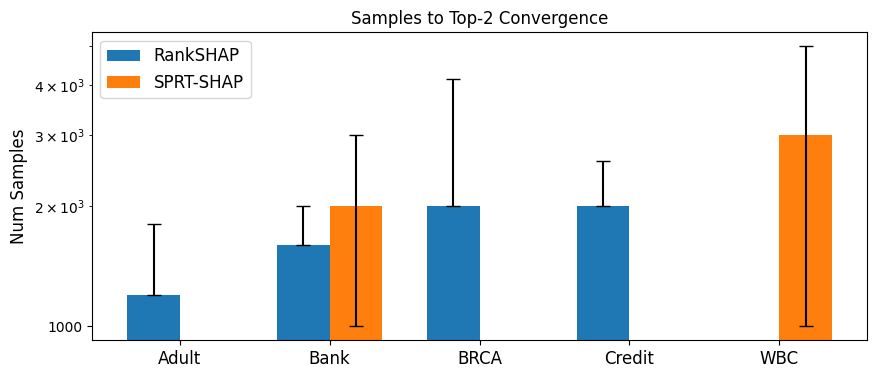

In [116]:
bar_width = 0.35
dataNames = ["Adult", "Bank", "BRCA", "Credit", "WBC"]
methodNames = ["RankSHAP", "SPRT-SHAP"]

# Index array for each group
index = np.arange(5)

# Plotting
fig, ax = plt.subplots(figsize=(10,4))

# Plotting bars for each row
for i in range(2):
    ax.bar(index + i * bar_width, shap_n_samples[i], bar_width, label=methodNames[i])
    ax.errorbar(index + i * bar_width, shap_n_samples[i], yerr=(shap_n_samples[i]-shap_q1[i], shap_q3[i]-shap_n_samples[i]), color="black", ls="none", capsize=5)

# Adding labels
ax.set_ylabel('Num Samples', fontsize="large")
ax.set_title('Samples to Top-2 Convergence', fontsize="large")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(dataNames, fontsize="large")
ax.set_yscale('log')

ax.yaxis.set_major_formatter(ScalarFormatter())

ax.legend(fontsize="large")
# plt.savefig(join(dir_path, "Experiments", "Figures", "n_samples_vs_kshap.png"), bbox_inches="tight")
plt.show()

